<img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="360" />

# Logistic Regression on Telecom Churn

## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Data Loading and Description](#section2)
3. [Preprocessing](#section3)
4. [Logistic Regression](#section4)<br>
    - 4.1 [Preparing X and y using pandas](#section403)<br>
    - 4.2 [Splitting X and y into training and test datasets.](#section404)<br>
    - 4.3 [Logistic regression in scikit-learn](#section406)<br>
    - 4.4 [Using the Model for Prediction](#section407)<br>
5. [Model evaluation](#section5)<br>
    - 5.1 [Model Evaluation using accuracy classification score](#section501)<br>
    - 5.2 [Model Evaluation using confusion matrix](#section502)<br> 

<a id=section1></a>

### __1. Problem Statement__

The goal is to predict churn of the customer.

Based on the information available, we will build a model, which will predict the customer churn or not.

We will analyze and give solution

- Why customers are leaving
- Detecting churn customers
- Prevent customers leaving  

Our target variable is "Churn". 1 indicates churns , 0 indicates not churns.


### __2. Data Loading and Description__

- The dataset containing all the necessary information about the customers like their Gender, MonthlyCharges, TotalCharges, PaymentMethod, InternetService, etc.

  Also included in the dataset is the column Churn which classifies whether the customer will churn or not.

- The dataset is divided into two parts: Train and Test sets.

  Train Set:
    The train set contains 5634 rows and 21 columns.
    The last column Churn is the target variable.

  Test Set:
    The test set contains 1409 rows and 20 columns.
    The test set doesn’t contain the Churn column.
    It needs to be predicted for the test set.
    

| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| Customer ID   | Customer Identity                                        | 
|Gender		|Whether the customer is a male or a female|
|SeniorCitizen	|Whether the customer is a senior citizen or not (1, 0)|
|Partner		|Whether the customer has a partner or not (Yes, No)|
|Dependents	|Whether the customer has dependents or not (Yes, No)|
|Tenure		|Number of months the customer has stayed with the company|
|PhoneService	|Whether the customer has a phone service or not (Yes, No)|
|MultipleLines	|Whether the customer has multiple lines or not (Yes, No, No phone service)|
|InternetService	|Customer’s internet service provider (DSL, Fiber optic, No)|
|OnlineSecurity	|Whether the customer has online security or not (Yes, No, No internet service)|
|OnlineBackup	|Whether the customer has online backup or not (Yes, No, No internet service)|
|DeviceProtection|Whether the customer has device protection or not (Yes, No, No internet service)|
|TechSupport	|Whether the customer has tech support or not (Yes, No, No internet service)|
|StreamingTV	|Whether the customer has streaming TV or not (Yes, No, No internet service)|
|StreamingMovies	|Whether the customer has streaming movies or not (Yes, No, No internet service)|
|Contract	|The contract term of the customer (Month-to-month, One year, Two year)|
|PaperlessBilling|Whether the customer has paperless billing or not (Yes, No)|
|PaymentMethod	|The customer’s payment method (Electronic check, Mailed check, |Bank transfer (automatic), Credit card (automatic))|
|MonthlyCharges	|The amount charged to the customer monthly|
|TotalCharges	|The total amount charged to the customer|
|Churn		|Whether the customer churned or not (Yes or No)|


#### Importing packages                                          

In [121]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
#import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [122]:
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)
#pd.reset_option('^display.', silent=True)

#### Importing the Dataset

In [123]:
#Reading Train and Test data Separately
df = pd.read_csv("https://raw.githubusercontent.com/sreeman-maddineni/TelecomChurnPredict/main/Churn_train.csv")     # Importing training dataset using pd.read_csv
df_test  = pd.read_csv("https://raw.githubusercontent.com/sreeman-maddineni/TelecomChurnPredict/main/Churn_test.csv")     # Importing 

In [124]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5442-PPTJY,Male,0,Yes,Yes,12,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.70,258.35,No
1,6261-RCVNS,Female,0,No,No,42,Yes,No,DSL,Yes,Yes,Yes,Yes,No,Yes,One year,No,Credit card (automatic),73.90,3160.55,Yes
2,2176-OSJUV,Male,0,Yes,No,71,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,No,Bank transfer (automatic),65.15,4681.75,No


In [125]:
df.shape

(5634, 21)

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


**Observation:**

By observing the data
- The customerID is not required we can drop it by keeping in another dataframe.
- Total charges has object type we will change it to float type.
- Tenure has integer type we will change it to float type.
- We will encode target variable (churn) to numeric type.

In [127]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,5634.000000,5634.000000,5634.000000
mean,0.161874,32.277955,64.779127
std,0.368368,24.555211,30.104993
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.400000
50%,0.000000,29.000000,70.375000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.650000


 **Observation:** 
 
 - There are no outliers in the data. The numbers are gradually increasing.

## __3. Preprocessing the data__

- Dealing with missing values<br/>
    - Dropping missing entries
    - Replacing missing values
    - Dropping the columns

In [128]:
df.duplicated().sum()

0

**Observation:**

- Dataset does not have any duplicated and missing values. We will look deeper.

In [129]:
# Function including major pre process statements
# we can use for both train and test data
def get_preproc_df(dataV,dftype):
    #dataT = pd.read_csv(path)
    dataT=dataV

    dataT['SeniorCitizen'] = pd.Categorical(dataT['SeniorCitizen'])
    dataT['TotalCharges']  = pd.to_numeric(dataT['TotalCharges'],errors = "coerce")

    if(dftype==0):
      empty_cols=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
    else:
      empty_cols=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


    for i in empty_cols:
      dataT[i]=dataT[i].replace(" ",np.nan)

    #df.isna().sum()
    #dataT.dropna(how='any',inplace=True)

    dataT['TotalCharges'] = dataT['TotalCharges'].fillna(dataT['TotalCharges'].median()) 
    return dataT

In [130]:
df=get_preproc_df(df,0)

In [131]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [132]:
#Copying Customer ID as Backup before dropping
df_ID=df[['customerID']].copy()

df=df.drop('customerID',axis=1)


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   gender            5634 non-null   object  
 1   SeniorCitizen     5634 non-null   category
 2   Partner           5634 non-null   object  
 3   Dependents        5634 non-null   object  
 4   tenure            5634 non-null   int64   
 5   PhoneService      5634 non-null   object  
 6   MultipleLines     5634 non-null   object  
 7   InternetService   5634 non-null   object  
 8   OnlineSecurity    5634 non-null   object  
 9   OnlineBackup      5634 non-null   object  
 10  DeviceProtection  5634 non-null   object  
 11  TechSupport       5634 non-null   object  
 12  StreamingTV       5634 non-null   object  
 13  StreamingMovies   5634 non-null   object  
 14  Contract          5634 non-null   object  
 15  PaperlessBilling  5634 non-null   object  
 16  PaymentMethod     5634 n

In [134]:
# divide the DS into numerical , categorical
numerics = ['float64', 'int64']
numeric_ds = df.select_dtypes(include=numerics) # for all numerical Datatypes
objects_ds = df.select_dtypes(exclude=numerics) # all categorical datatypes

In [135]:
# Group the tenure etc into bins as [0-20],[20-60],[60-80] as low , medium, high 
tenure_bins=pd.cut(numeric_ds["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])
MonthlyCharges_bins=pd.cut(numeric_ds["MonthlyCharges"], bins=[0,35,60,130], labels=['low','medium','high'])
TotalCharges_bins=pd.cut(numeric_ds["TotalCharges"], bins=[0,1000,4000,10000], labels=['low','medium','high'])
# Thus, there are 3 bins for numerical variables according to the violin plot 
# from this we can try to separate / distinguish the low churn rate areas from the high churn rate areas
# Save all bins into a variable bin-another data frame now.
bins=pd.DataFrame([tenure_bins, MonthlyCharges_bins, TotalCharges_bins]).T

Doing Same Procedure on Test Data

In [136]:
df_test.duplicated().sum()

0

In [137]:
df_test=get_preproc_df(df_test,1)

In [138]:
df_test_ID=df_test[['customerID']].copy()

df_test=df_test.drop('customerID',axis=1)

In [139]:
# divide the DS into numerical , categorical
numeric_ds_test = df_test.select_dtypes(include=numerics) # for all numerical Datatypes
objects_ds_test = df_test.select_dtypes(exclude=numerics) # all categorical datatypes

In [140]:
# Group the tenure etc into bins as [0-20],[20-60],[60-80] as low , medium, high 
tenure_bins_test=pd.cut(numeric_ds_test["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])
MonthlyCharges_bins_test=pd.cut(numeric_ds_test["MonthlyCharges"], bins=[0,35,60,130], labels=['low','medium','high'])
TotalCharges_bins_test=pd.cut(numeric_ds_test["TotalCharges"], bins=[0,1000,4000,10000], labels=['low','medium','high'])
# Thus, there are 3 bins for numerical variables according to the violin plot 
# from this we can try to separate / distinguish the low churn rate areas from the high churn rate areas
# Save all bins into a variable bin-another data frame now.
bins_test=pd.DataFrame([tenure_bins_test, MonthlyCharges_bins_test, TotalCharges_bins_test]).T

## __EDA__

Doing EDA on Train data

Churn Percentages are
 No     73.003195
Yes    26.996805
Name: Churn, dtype: float64


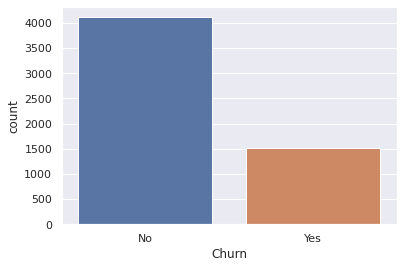

In [141]:
sns.countplot(df.Churn);
print ('Churn Percentages are\n',(df.Churn.value_counts() / df.Churn.count())*100)

**Observation:**

Analysis shows that Churn rate of the Telecom company is around 27%.


**Numerical Data Analysis**

In [142]:
def numeric_dist_plot(numeric_ds):
  # We use plots to check how values are distributed, how columns relate with each other and 
  # how they relate and help predict the ‘Churn’ variable. 
  # for distribution, use the boxplot and histogram plots:

  # box plots
  numeric_ds.plot(kind = 'box', subplots = True, figsize=(15,5))
  plt.plot()

In [143]:
def numeric_hist_plot(numeric_ds):
  numeric_ds.hist(layout=(1,3), figsize=(15,5))
  plt.plot()

In [144]:
def numeric_pair_plot(numericds):
  # Relate these numeric data to churn variable to know how they relate / impact
  numericds = pd.concat([numericds,df["Churn"]],axis=1) #Add the 'Churn' variable to the numeric dataset
  #numeric_ds.info()  
  g = sns.PairGrid(numericds.sample(n=1000), hue="Churn") # is to plot subplots
  g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
  g = g.map_diag(sns.kdeplot) # known as kernal density estimation.
  g = g.add_legend()


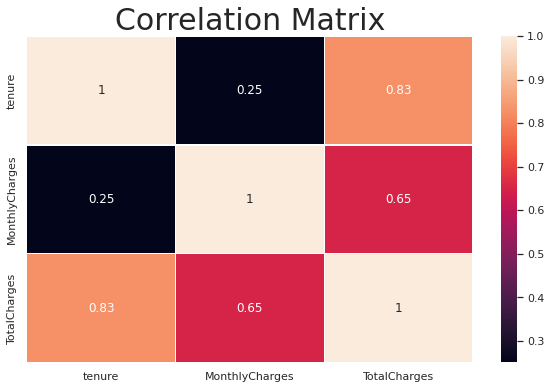

In [145]:
plt.subplots(figsize=(10, 6))
plt.title('Correlation Matrix', size=30)
sns.heatmap(numeric_ds.corr(),annot=True,linewidths=0.5)

**Observation:**
- Tenure and TotalCharges are strongly correlated, which is logical since the longer you have been a customer, the more money you will likely spend.
- MonthlyCharges and TotalCharges are correlated, which is logical since a high monthly expense will ultimately lead to a high total expense.

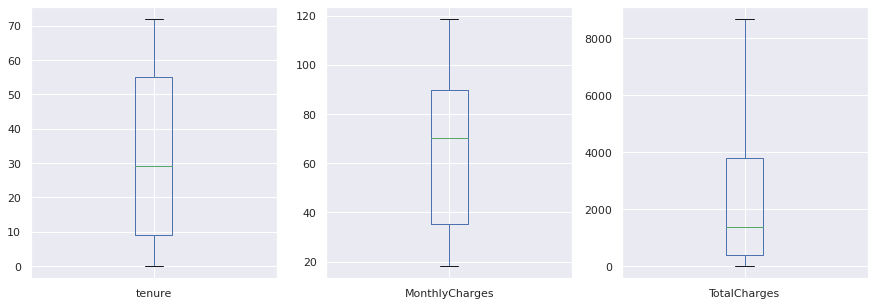

In [146]:
numeric_dist_plot(numeric_ds)

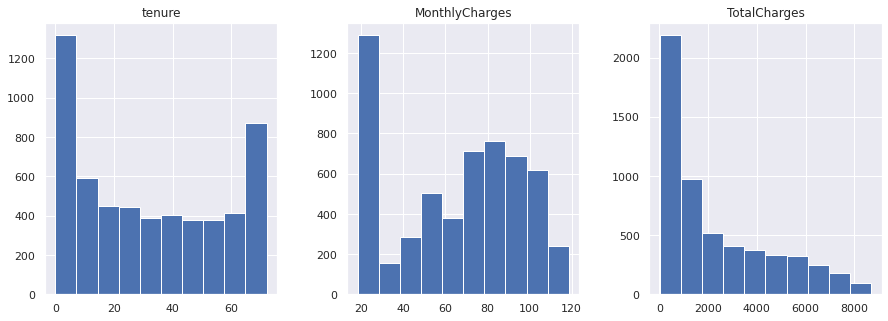

In [147]:
numeric_hist_plot(numeric_ds)

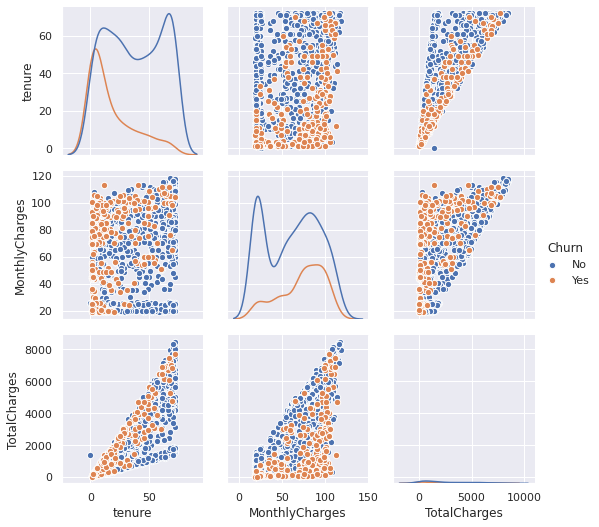

In [148]:
numeric_pair_plot(numeric_ds)

**Observation:**

- Observing the plots, monthly charges and tenure seems to be playing good role in churn, and can act as a good predictors.


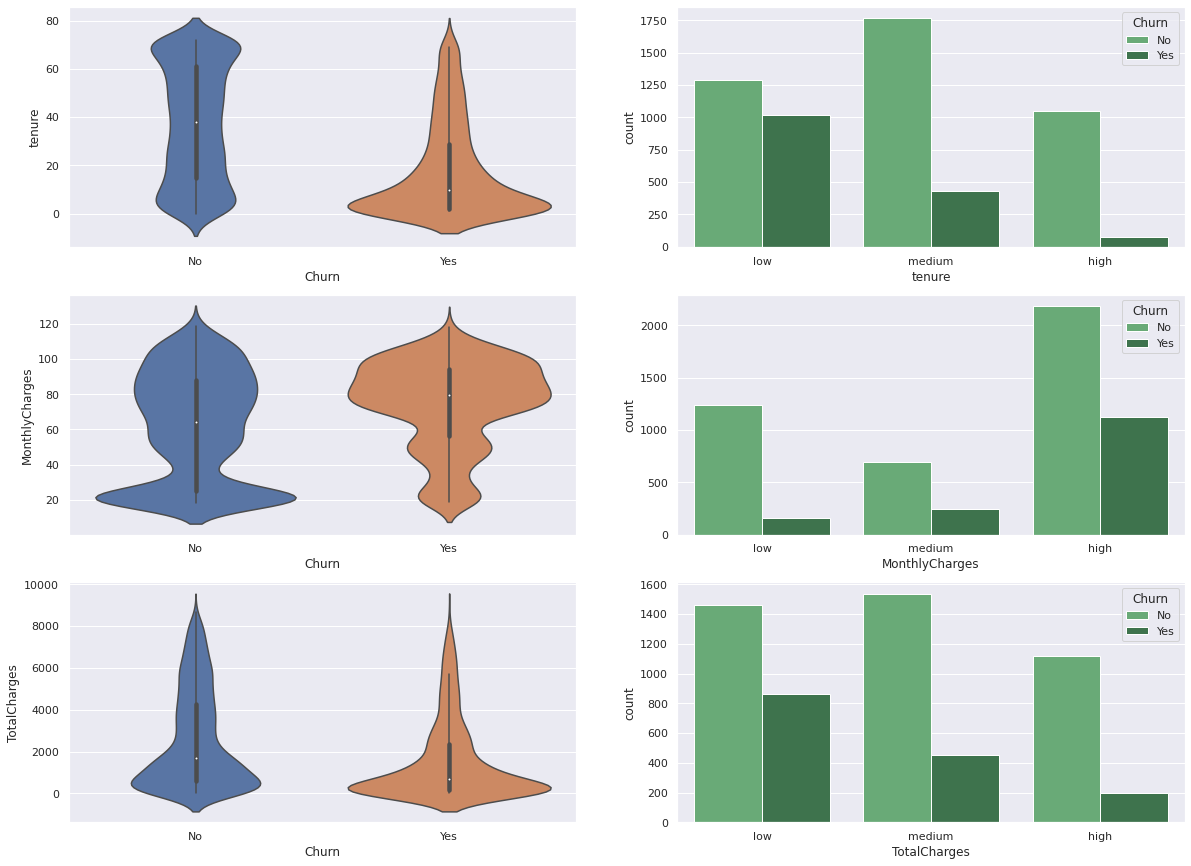

In [149]:
  # Relate these numeric data to churn variable to know how they relate / impact
  T_numeric_ds = pd.concat([numeric_ds,df["Churn"]],axis=1) #Add the 'Churn' variable to the numeric dataset

  #n_bins = 10 
  fig, ((ax0, ax1), (ax2, ax3), (ax4, ax5)) = plt.subplots(nrows=3, ncols=2,figsize=(20,15))
  # set the spacing between subplots
  #plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9,top=0.9,wspace=0.4,hspace=0.4)
 
  ############################
  sns.violinplot(x="Churn", y="tenure", data=T_numeric_ds, ax=ax0);
  #ax0.set(xlabel="Ratings")

 
  #plot the graph, with relation to churn
  sns.countplot(x=tenure_bins, hue="Churn", data=T_numeric_ds, palette="Greens_d", ax=ax1);

  ############################
  #similarly, monthly charges
  sns.violinplot(x="Churn", y="MonthlyCharges", data=T_numeric_ds, ax=ax2);

  
  sns.countplot(x=MonthlyCharges_bins, hue="Churn", data=T_numeric_ds, palette="Greens_d", ax=ax3);

  ###########################
  # With total Charges
  sns.violinplot(x="Churn", y="TotalCharges", data=T_numeric_ds, ax=ax4);


  sns.countplot(x=TotalCharges_bins, hue="Churn", data=T_numeric_ds, palette="Greens_d", ax=ax5);

  ############################
  #sns.set(rc={'figure.figsize':(11.7, 8.27)})
  warnings.filterwarnings( "ignore", module = "matplotlib\..*" )

  
  

**Observation**
- Churn customers have more Monthly charges compared to existing customers
- who’s tenure is low, more likely to leave


**Categorical Plots**

In [150]:
def objplot(objds):
 fig,ax =plt.subplots(4,4,figsize=(18,15))
 fig.subplots_adjust(hspace=.5)
 for i in range(0,16):
    g = sns.countplot(x=objds.iloc[:,i], hue=objds["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
 for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

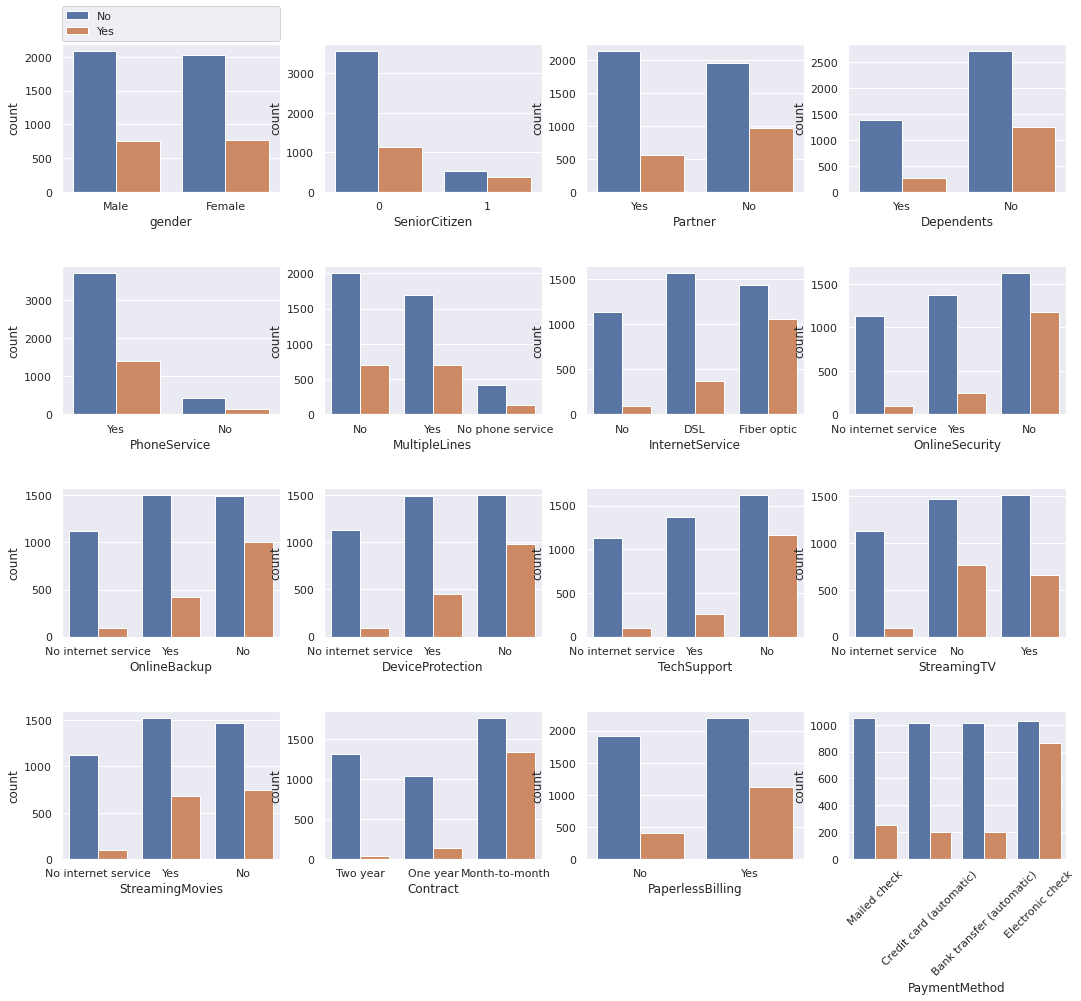

In [151]:
objplot(objects_ds)

**Observation:** 

- From this graph, we understand that Streaming Movies, TV and Contract, Paperbilling, Payment Method Online backup , device protection, Support Online Service all play a good role in determining. hence we will keep all of the variables.

- Gender is neutral, male and female, both tend to show similar results, similarly, multiple lines.

-	Partner : Customer without any relationship, single customer more likely churn than customer with a partner.
-	Dependents : Customer without any dependents more likely churn than customer with a dependent.
-	Phone Service: Churn rate difference between customer has a phone service with the company and customer does not have a home phone service with the company is very small.  
-	Multiple Lines : Churn rate difference between customer has a multiple lines phone service with the company and customer does not have a multiple line phone service with the company is very small.

-	ìnternet Service : Customer with fiber optic internet with the company compare to customer without any internet service with the company more likely to churn.

-	Online Security: A customer with an online security service with the company less likely to leave the company than a customer without any online security service with the company.
-	Online Backup A customer with an online backup service with the company less likely to leave the company than a customer without any online backup service with the company.
-	Device Protection : A customer with a device protection service with the company less likely to leave the company than a customer without any a device protection service with the company.
-	Tech Support : A customer with a Tech Support service with the company less likely to leave the company than a customer without any a Tech Support service with the company.
-	Streaming TV Service : A customer with a Streaming TV service with the company more likely to leave the company than a customer without any a Streaming TV service with the company.
-	Streaming Movies Service : A customer with a Streaming Movies service with the company more likely to leave the company than a customer without any a Streaming movies service with the company.
-	Contract Type : Great differences based on the contract were seen in the histogram and mean differences.
  -	Customer with the 2 year contract less likely to churn compare to customer with a monthly contract.
  -	On the other hand customer with the 1 year contract less likely to churn compare to customer with a monthly contract.
-	Paperless Billing : A customer with a paperless billing with the company more likely to leave the company than a customer without a paperless billing with the company.
-	Payment Method : Almost half of the customers with a payment method as a Electornic Check churn, which is a quite big percentage.



## Creating dummy variables for our categorical variables

In [152]:
# Concatenate numerical bins with object variables
data=pd.concat([bins,objects_ds],axis=1)  
for i in list(data.columns):
    data[i] = pd.Categorical(data[i]) # Convert all the variables into categorical
dummy = pd.get_dummies(data) # Transform the categorical variables into binary vectors
dummy.head(2)

,tenure_high,tenure_low,tenure_medium,MonthlyCharges_high,MonthlyCharges_low,MonthlyCharges_medium,TotalCharges_high,TotalCharges_low,TotalCharges_medium,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,1,1,0
1,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1


In [153]:
# Concatenate numerical bins with object variables
data_test=pd.concat([bins_test,objects_ds_test],axis=1)  
for i in list(data_test.columns):
    data_test[i] = pd.Categorical(data_test[i]) # Convert all the variables into categorical
dummy_test = pd.get_dummies(data_test) # Transform the categorical variables into binary vectors
dummy_test.head(2)

,tenure_high,tenure_low,tenure_medium,MonthlyCharges_high,MonthlyCharges_low,MonthlyCharges_medium,TotalCharges_high,TotalCharges_low,TotalCharges_medium,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0
1,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,1,0,0,0


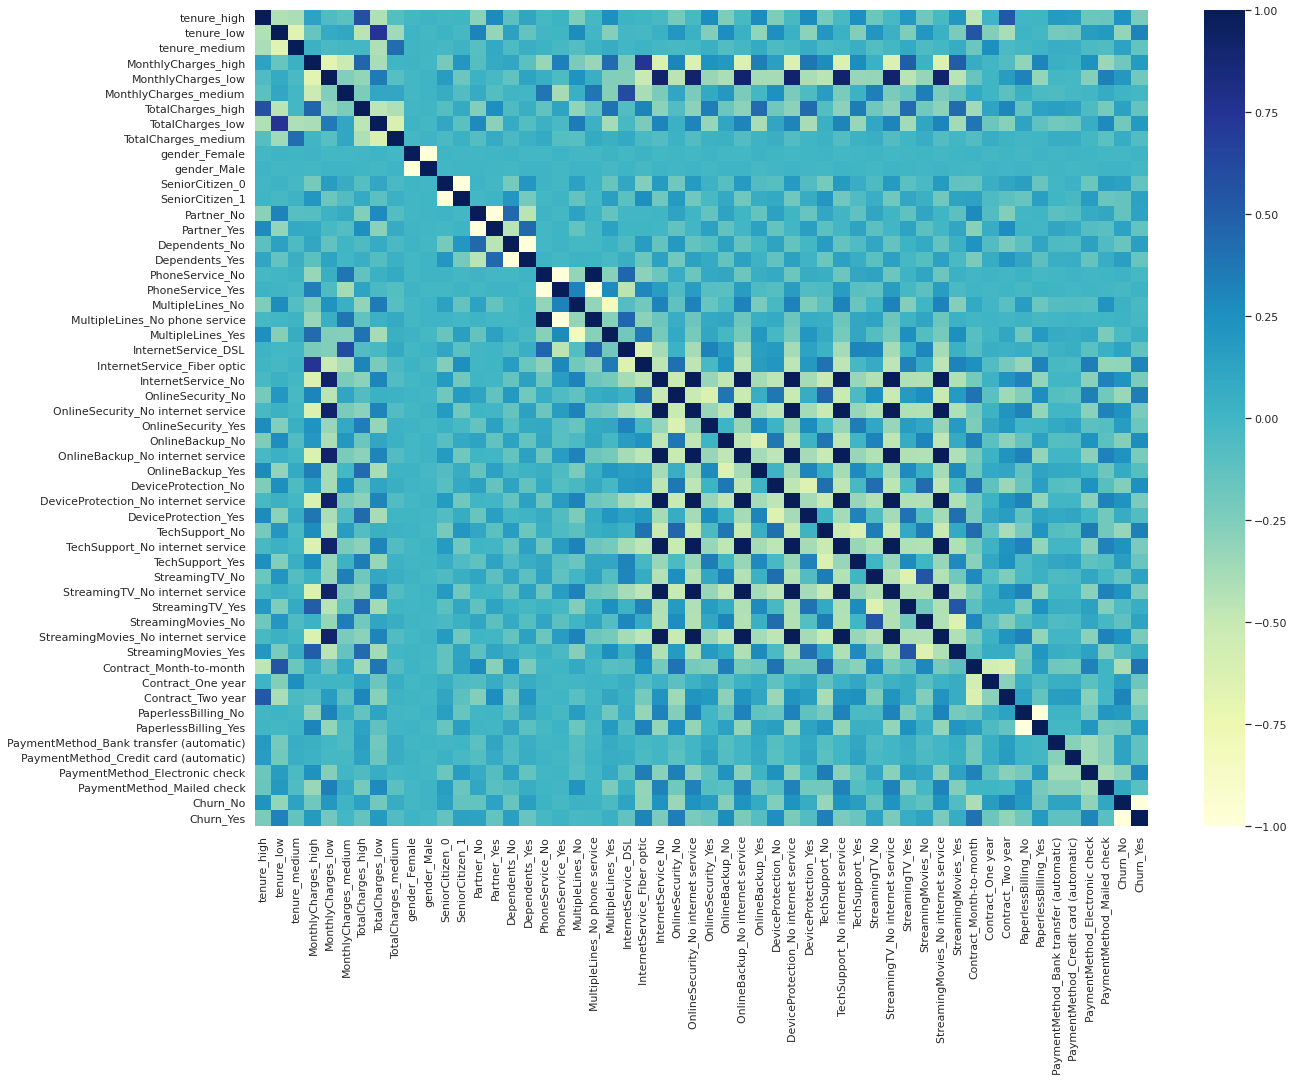

In [154]:
corr=dummy.corr().iloc[:,:] 
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

plt.subplots(figsize=(20,15))
sns.heatmap(corr,annot=False,cmap="YlGnBu")

**Observation:**

- The 'No Internet service' in various categorical variables seem to be strongly correlated with each other.Their coorelation with the target variable is on the lower side.



<a id=section4></a>

## __4. Logistic Regression__

## 4.1 Preparing X and y using pandas

In [155]:
features = dummy.drop(["Churn_Yes", "Churn_No"], axis=1).columns
X = dummy[features]
Y = dummy["Churn_Yes"]

In [156]:
features_test = dummy_test.columns
Xtest_Data = dummy_test[features_test]
 

In [157]:
#data_cont = ['tenure','MonthlyCharges', 'TotalCharges']
#sc=StandardScaler()
#X[data_cont]=sc.fit_transform(X[data_cont])

## 4.2 Splitting X and y into training and test datasets.

In [158]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=7)

In [159]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',Y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',Y_test.shape)

Train cases as below
X_train shape:  (4507, 52)
y_train shape:  (4507,)

Test cases as below
X_test shape:  (1127, 52)
y_test shape:  (1127,)


## 4.3 Logistic regression in scikit-learn

In [160]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

<a id=section407></a>

## 4.4 Using the Model for Prediction

In [161]:
predictions = logreg.predict(X_test)
print(accuracy_score(Y_test, predictions))
 

0.8101153504880213


**Observation:**
- Shows the accuracy score to be 81%. which is a good score.


In [162]:
Tdata_predictions = logreg.predict(Xtest_Data)

In [163]:
Tdata_predictions

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [164]:
Tdata_probabilities = logreg.predict_proba(Xtest_Data)

In [165]:
print(Tdata_probabilities)

[[0.93786    0.06214   ]
 [0.89191716 0.10808284]
 [0.58994988 0.41005012]
 ...
 [0.987513   0.012487  ]
 [0.78427418 0.21572582]
 [0.33070862 0.66929138]]


In [166]:
probabilities_1 = Tdata_probabilities[:,1]
probabilities_0 = Tdata_probabilities[:,0]

In [167]:
print(probabilities_1)

[0.06214    0.10808284 0.41005012 ... 0.012487   0.21572582 0.66929138]


In [168]:
 #Copying ID's previously stored
 test_predictions = df_test_ID

In [169]:
test_predictions['predicted_default'] = Tdata_predictions  # based on 0.5 threshold

In [170]:
test_predictions

,customerID,predicted_default
0,8879-ZKJOF,0
1,0201-MIBOL,0
2,1600-DILPE,0
3,8601-QACRS,0
4,7919-ZODZZ,0
...,...,...
1404,5130-IEKQT,0
1405,4452-ROHMO,0
1406,6164-HAQTX,0
1407,3982-DQLUS,0


In [171]:
test_predictions['probability'] = probabilities_1

In [172]:
test_predictions.head(3)

,customerID,predicted_default,probability
0,8879-ZKJOF,0,0.062140
1,0201-MIBOL,0,0.108083
2,1600-DILPE,0,0.410050


In [173]:
test_predictions['new_predictions_0_6'] = 0

In [174]:
test_predictions.loc[test_predictions['probability']>=0.6,'new_predictions_0_6'] = 1

In [175]:
test_predictions['Churn'] = test_predictions['predicted_default'].map({1: 'Yes', 0: 'No'})


In [176]:
test_predictions.head(10)

,customerID,predicted_default,probability,new_predictions_0_6,Churn
0,8879-ZKJOF,0,0.062140,0,No
1,0201-MIBOL,0,0.108083,0,No
2,1600-DILPE,0,0.410050,0,No
3,8601-QACRS,0,0.495117,0,No
4,7919-ZODZZ,0,0.183236,0,No
5,7964-ZRKKG,0,0.134448,0,No
6,1357-BIJKI,0,0.333468,0,No
7,8720-RQSBJ,0,0.430179,0,No
8,4682-BLBUC,0,0.051136,0,No
9,8930-XOTDP,0,0.245226,0,No


In [177]:
# Churn variable based on default predicted value
Pred_OP=test_predictions[['customerID','Churn']].copy()

In [178]:
Pred_OP.to_csv('submission.csv', index=False, header=False)

In [179]:
weights = pd.Series(logreg.coef_[0],
 index=X.columns.values)
weights.sort_values(ascending = False)

Contract_Month-to-month                    0.799209
InternetService_Fiber optic                0.742767
tenure_low                                 0.637173
TotalCharges_low                           0.452458
StreamingMovies_Yes                        0.298284
MonthlyCharges_low                         0.286929
TechSupport_No                             0.232748
StreamingTV_Yes                            0.219123
OnlineSecurity_No                          0.219058
MultipleLines_Yes                          0.167974
PaymentMethod_Electronic check             0.166688
OnlineBackup_No                            0.156928
PaperlessBilling_Yes                       0.150577
SeniorCitizen_1                            0.114202
DeviceProtection_No                        0.105045
MonthlyCharges_medium                      0.091084
DeviceProtection_Yes                       0.064552
Contract_One year                          0.044702
Dependents_No                              0.039834
Partner_No  

**Inferences and Conclusion** 

- By above we can know which independant variables have most influence on predicte outcome. some variables have a positive relation to our predicted variable and some have a negative relation. Customers with negative values show that they are unlikely to churn while those with positive values shows they are likely to churn.

- Based on our exploration of Telecom customer data, we can conclude that retaining customers for the first 6 months is essential for preventing churn. This is because we concluded that:

  -  The overall churn rate for the Telco dataset is 26.99 %

  -  The churn rate for customers with less tenure is more

  -  The churn rate for customers with medium tenure is somewhat higher than  churn rate for customers with higher tenure.

Therefore, it may be prudent to recommend that this Telco company implements a strategy that incentivizes customers to stay with the company through that crucial less tenure threshhold.